<a href="https://colab.research.google.com/github/gulabpatel/Statistics/blob/main/03%3A%20Categorical_Variables_Cramer's_V_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video link of code walkthrough below is here - https://www.youtube.com/watch?v=W8ELro02w5c

Cramer's V test documentation(SPSS) : https://www.spss-tutorials.com/cramers-v-what-and-why/

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/ML_Data_and_Resources/master/churn_data_st.csv')

In [3]:
churn_df = churn_master_df.copy()

In [4]:
churn_df.sample(15)

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
3791,3453-RTHJQ,Male,0,6,2,Month-to-month,Yes,69.10,435.00,No
6823,7009-LGECI,Female,0,4,3,Month-to-month,Yes,50.55,235.65,No
4533,5360-LJCNJ,Female,0,71,7,Two year,Yes,105.15,7555.00,No
6368,2720-WGKHP,Male,1,2,5,Month-to-month,Yes,94.00,181.70,Yes
129,2639-UGMAZ,Male,1,71,5,One year,Yes,56.45,3985.35,No
2053,6173-ITPWD,Male,0,47,5,Month-to-month,Yes,83.35,4065.00,Yes
2177,2878-RMWXY,Male,1,72,7,Two year,Yes,102.65,7550.30,No
4994,9692-TUSXH,Female,0,18,5,Month-to-month,Yes,96.05,1740.70,Yes
799,3009-JWMPU,Male,0,62,6,One year,Yes,96.75,6125.40,Yes
930,5146-CBVOE,Female,0,16,3,Month-to-month,No,75.10,1212.85,No


customerID - Customer ID

Gender - Male or Female

SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

tenure - Number of months the customer has stayed with the company

ServiceCount - Number of services/product customer has availed

Contract - The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

MonthlyCharges - The amount charged to the customer monthly

TotalCharges - The total amount charged to the customer

Churn - Whether the customer churned or not (Yes or No)

In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [6]:
print ("Rows     : " ,churn_df.shape[0])
print ("Columns  : " ,churn_df.shape[1])
print ("\nFeatures : \n" ,churn_df.columns.tolist())
print ("\nUnique values :  \n",churn_df.nunique())

Rows     :  7043
Columns  :  10

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64


In [7]:
churn_df.corr() ##will show the correlation(pearson) betweens numerical columns only

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,-0.090899,0.220173,0.100795
tenure,0.016567,1.000000,0.508526,0.247900,0.826066
ServiceCount,-0.090899,0.508526,1.000000,0.041463,0.443768
MonthlyCharges,0.220173,0.247900,0.041463,1.000000,0.650964
TotalCharges,0.100795,0.826066,0.443768,0.650964,1.000000


To find out the correlation between categorical column

In [8]:
churn_df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

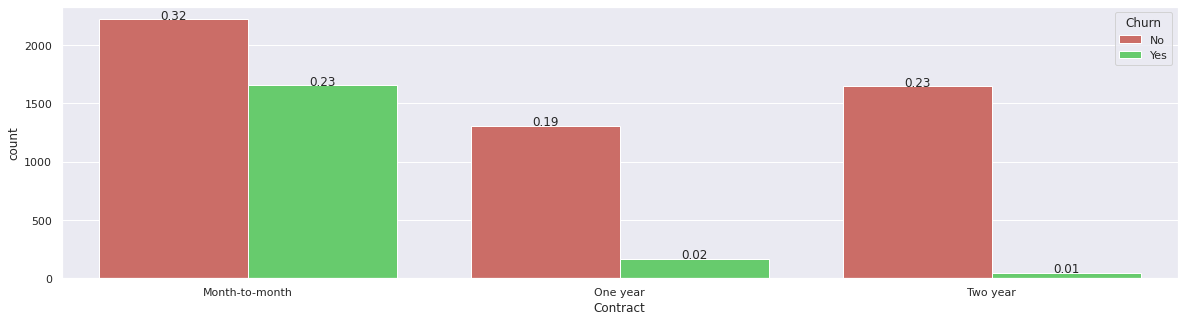

In [9]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="Contract", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/churn_df.shape[0]),
            ha="center") 

*** chi-square statistics:

****** **X^2 = sum((Observed – Expected)^2 / Expected)**

Chi2 chest shows the significance of the relationship but doesn't show the strength of the coreelation

Cramer V Test:

**V = SQRT(chi2/(n*(min(C,R)-1))**

Cramers V test shows the strength of the relationship

In [10]:
pd.crosstab(index=churn_df['Contract'], columns=churn_df['Churn'], margins=True)

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [11]:
contract_churn_ct = pd.crosstab(index=churn_df['Contract'], columns=churn_df['Churn'], margins=True)

In [12]:
contract_churn_ct.iloc[0].values

array([2220, 1655, 3875])

*** scipy.stats.chi2_contingency(observed, correction=True, lambda_=None)[source]

> Indented block







In [13]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([contract_churn_ct.iloc[0].values,contract_churn_ct.iloc[1].values])

In [14]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  469.8074788942832
p-value  :  9.607318302643863e-103
Degree for Freedom :  2


p < 0.05, there is a significant correlation

Cramer's V Test:

**V = SQRT(chi2/(n*(min(C,R)-1))**

In [15]:
import numpy as np

In [16]:
np.sqrt(chi2/(churn_df.shape[0]))

0.25827425580247043

Now let's check correlation between "PaperlessBilling" and "Churn"

In [17]:
churn_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

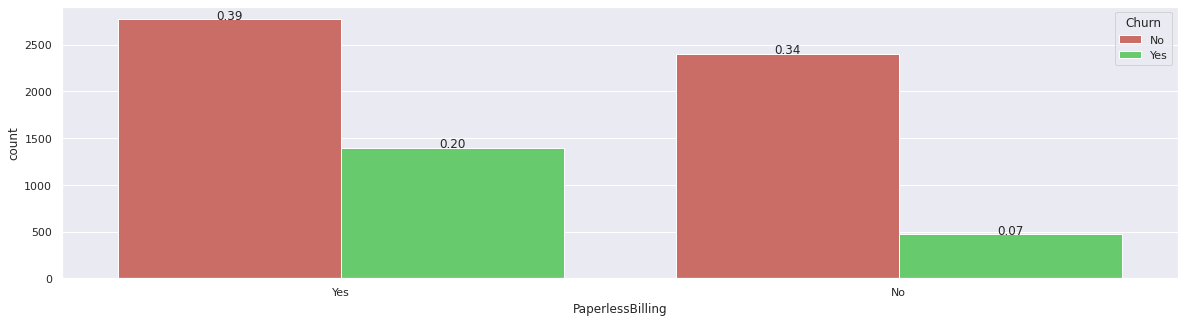

In [18]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/churn_df.shape[0]),
            ha="center") 

In [19]:
pb_churn_ct=pd.crosstab(index=churn_df['PaperlessBilling'],columns=churn_df['Churn'])

In [20]:
pb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [21]:
(chi2, p, dof,_) = stats.chi2_contingency([pb_churn_ct.iloc[0].values,pb_churn_ct.iloc[1].values])

In [22]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  258.27764906707307
p-value  :  4.073354668665985e-58
Degree for Freedom :  1


P values not as small as previous value for Contratc, less check the Cramer's V Test, and we see that relationship strenght is not as strong as for Contract

In [23]:
np.sqrt(chi2/(churn_df.shape[0]))

0.19149814355338285

Now Let's check for "gender" and "Churn"

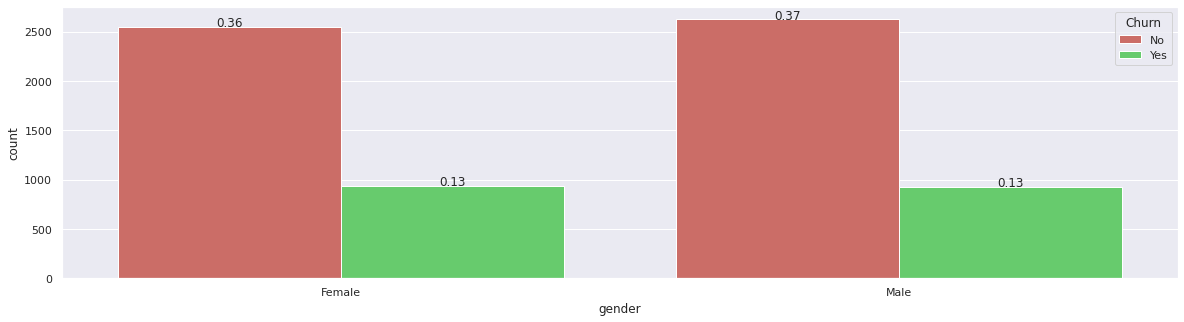

In [24]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="gender", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/churn_df.shape[0]),
            ha="center") 

In [25]:
gender_churn_ct=pd.crosstab(index=churn_df['gender'],columns=churn_df['Churn'])

In [26]:
gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [27]:
(chi2, p, dof,_) = stats.chi2_contingency([gender_churn_ct.iloc[0].values,gender_churn_ct.iloc[1].values])

In [28]:
print ("chi2     : " ,chi2)
print ("p-value  : " ,p)
print ("Degree for Freedom : " ,dof)

chi2     :  0.4840828822091383
p-value  :  0.48657873605618596
Degree for Freedom :  1


Here p > 0.05 so there is no correlation, let's check the V test:

In [29]:
np.sqrt(chi2/(churn_df.shape[0]))

0.008290505631771371

Strength value ois very small so there is almost no relationship between "gender" and "churn"

---------------------